# Metrolytics Word Vectors
In this notebook we'll create embeddings for words in our corpus, and look for interesting phenomena.

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
 
# from collections import Counter

In [4]:
df = pd.read_parquet('lyrics.parquet')

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

=====================  
First, let's create a function for processing the tesxt. We will test this function on a song, as an example.

Finally, let's train word vectors on our new corpus. 

In [ ]:
# TODO: Add a parameter for context size
import gensim
w2v = gensim.models.Word2Vec(df.sent, sg=1, min_count=20, size=300, window=3, workers=7)
model.init_sims(replace=True) # frees memory of word vectors but prevents further training

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [2]:
def evaluate_words(words_to_check = ['love', 'hate', 'lonely', 'heartache', 'success', 'guitar', 'god', 'beer', 'gun', 'police']):
    for word in words_to_check:
        print(word, ' -> ')
        print('\n'.join(['\t{} ({:.2f}), '.format(tup[0], tup[1]) for tup in w2v.wv.similar_by_word(word, topn=5)]))
        print()

In [ ]:
evaluate_words()

Now let's try with a smaller dimension of vectors (50):

In [242]:
import gensim
w2v = gensim.models.Word2Vec(df.sent, sg=1, min_count=5, size=50, workers=CPUS*2-1)

In [243]:
evaluate_words()

love  ->  ['unconditional (0.48), ', 'tenderness (0.45), ', 'tenderly (0.43), ', 'untrue (0.42), ', 'certainly (0.42), ']

hate  ->  ['breeds (0.45), ', 'frenzy (0.44), ', 'hateful (0.44), ', 'successful (0.43), ', 'hatred (0.43), ']

lonely  ->  ['lonesome (0.51), ', 'alone (0.46), ', 'dreary (0.44), ', 'unsure (0.43), ', 'deserted (0.43), ']

heartache  ->  ['heartaches (0.45), ', 'sorrow (0.44), ', 'unsure (0.41), ', 'heartbreak (0.40), ', 'aches (0.37), ']

success  ->  ['invest (0.45), ', 'effort (0.44), ', 'acknowledge (0.43), ', 'failures (0.42), ', 'interest (0.42), ']

guitar  ->  ['saxophone (0.59), ', 'keyboards (0.54), ', 'banjo (0.52), ', 'vocals (0.52), ', 'fiddle (0.51), ']

god  ->  ['lord (0.52), ', 'bless (0.50), ', 'almighty (0.49), ', 'praises (0.47), ', 'emmanuel (0.46), ']

beer  ->  ['chug (0.58), ', 'bourbon (0.47), ', 'drinkin (0.46), ', 'bartender (0.45), ', 'beers (0.45), ']

gun  ->  ['guns (0.53), ', 'aimed (0.50), ', 'bucked (0.45), ', 'rifle (0.45), ', 'b

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [279]:
model = w2v

In [280]:
word_combinations_to_try = [
    ['woman', 'king', 'man'], 
    ['girl', 'brother', 'boy']
    ['man', 'daughter', 'woman'],
    ['mother', 'he', 'father'],
    ['strong', 'small', 'weak'] 
]

for word_combination in word_combinations_to_try:
    print(word_combination)
    print( model.wv.most_similar_cosmul(positive=word_combination[:2], negative=word_combination[2])[0] )
    print( model.wv.most_similar(positive=word_combination[:2], negative=word_combination[2])[0] )

[('riverboat', 0.7404574155807495),
 ('towns', 0.7367786169052124),
 ('squatin', 0.7236427068710327),
 ('rattler', 0.7200068235397339),
 ('storeys', 0.7182438373565674),
 ('piddly', 0.7121356725692749),
 ('broncs', 0.7105759382247925),
 ('big', 0.709046483039856),
 ('extraordinary', 0.7045096158981323),
 ('uphill', 0.700311541557312)]

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

We start by downloading the data and extracting it. We will create a dictionary with the keys are the words and the values are their sentiment scores.  
Note that the sentiment dataset contains terms of multiple words and hashtags - we will remove these from the dataset.

In [248]:
!wget http://saifmohammad.com/WebDocs/lexiconstoreleaseonsclpage/SemEval2015-English-Twitter-Lexicon.zip
!unzip SemEval2015-English-Twitter-Lexicon.zip
!head SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open SemEval2015-English-Twitter-Lexicon.zip, SemEval2015-English-Twitter-Lexicon.zip.zip or SemEval2015-English-Twitter-Lexicon.zip.ZIP.
head: cannot open 'SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt' for reading: No such file or directory


In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

In [ ]:
# https://radimrehurek.com/gensim/scripts/glove2word2vec.html
if False:
    tmp_file = get_tmpfile("w2v.twitter.27B.100d.txt")
    glove2word2vec('glove.twitter.27B.100d.txt', tmp_file)
    model = KeyedVectors.load_word2vec_format(tmp_file)

In [281]:
with open('SemEval2015-English-Twitter-Lexicon.txt', 'r') as f:
    scores, twitter_sentiment_words = zip(*[line.strip().split() for line in f.readlines()])

twitter_sentiment_words = [w[1:] if w.startswith('#') else w for w in twitter_sentiment_words]
X = []
y = []

for i in range(len(scores)):
    if twitter_sentiment_words[i] in model:
        X.append(model[twitter_sentiment_words[i]])
        y.append(scores[i])

X = np.array(X, dtype='float')
y = np.array(y, dtype='float')

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.1, random_state=0) # We used 10,000 songs from each category - 1,000 songs in the test set seem like a lot. 

Next let's build a regressor to predict the sentiment of a word from its word vector. We use the word vectors trained on our corpus of song lyrics.  
Let's try a few different algorithms, and choose the one with the smallest MSE on the test set:

In [282]:
from sklearn import metrics

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    LinearRegression(),
    MLPRegressor(max_iter=1000, tol=1e-5, hidden_layer_sizes=(300,200,100)),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
score = {}
for model in models:
    model_name = str(model).split('(')[0]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score[model_name] = metrics.mean_squared_error(y_test, y_pred)

print(score)

{'LinearRegression': 0.1461719188325224, 'MLPRegressor': 0.1400196267916689, 'RandomForestRegressor': 0.1328502358965349, 'GradientBoostingRegressor': 0.13311542397256862, 'SVR': 0.14364863448496495}


In [283]:
model = models[-1]

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [285]:
num_words = 0
test_words = []
for w, _ in freqs_bg.most_common(10000):
    if w not in twitter_sentiment_words and w in w2v:
        test_words.append(w)
        num_words += 1
    if num_words == 1000:
        break

similar_words_features = np.array([w2v[w] for w in test_words], 'float')
sentiment_scores = model.predict(similar_words_features)

df_predicted_sentiment = pd.Series(sentiment_scores, index=test_words)

print(' --- top 20 negative sentiment score --')
print( df_predicted_sentiment.sort_values().head(20) )

print()
print(' --- top 20 positive sentiment score --')
print( df_predicted_sentiment.sort_values().tail(20) )

 --- top 20 negative sentiment score --
insane      -0.953164
murder      -0.881354
brain       -0.851091
dead        -0.730255
dogs        -0.674408
blame       -0.667665
bleed       -0.647019
shots       -0.630486
knife       -0.618161
escape      -0.609505
killing     -0.608435
screaming   -0.597452
burns       -0.577888
dog         -0.576041
cries       -0.572600
dry         -0.566243
suck        -0.565417
drown       -0.552088
police      -0.548990
bones       -0.544439
dtype: float64
 --- top 20 positive sentiment score --
glory        0.759939
bells        0.776034
together     0.811427
lift         0.825720
la           0.825809
stars        0.826998
ladies       0.828676
shine        0.834932
shining      0.839877
jesus        0.870399
magic        0.900729
il           0.906875
sing         0.909356
brand        0.911102
bright       0.923421
per          0.931616
lo           0.932336
che          1.019308
special      1.026534
christmas    1.253884
dtype: float64


### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [141]:
!pip install tqdm

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [164]:
from tqdm import tqdm 

freqs = {}
for i,r in tqdm(df.iterrows()):
    if r.genre not in freqs:
        freqs[ r.genre ] = Counter()
    freqs[ r.genre ].update(r.sent)



0it [00:00, ?it/s]

239it [00:00, 2298.59it/s]

572it [00:00, 2511.28it/s]

1138it [00:00, 2995.34it/s]

1614it [00:00, 3341.95it/s]

2166it [00:00, 3759.90it/s]

2616it [00:00, 3914.02it/s]

3071it [00:00, 4042.05it/s]

3482it [00:00, 4014.89it/s]

4139it [00:00, 4507.84it/s]

4771it [00:01, 4886.83it/s]

5387it [00:01, 5157.63it/s]

6004it [00:01, 5368.40it/s]

6559it [00:01, 4957.18it/s]

7074it [00:01, 4537.21it/s]

7681it [00:01, 4862.00it/s]

8354it [00:01, 5254.26it/s]

8968it [00:01, 5433.96it/s]

9530it [00:02, 4489.43it/s]

10019it [00:02, 4452.29it/s]

10493it [00:02, 4336.07it/s]

10947it [00:02, 4295.87it/s]

11391it [00:02, 4144.05it/s]

11817it [00:02, 3699.62it/s]

12267it [00:02, 3868.10it/s]

12750it [00:02, 4072.36it/s]

13379it [00:02, 4515.25it/s]

13855it [00:03, 4383.62it/s]

14311it [00:03, 4190.89it/s]

14748it [00:03, 4194.31it/s]

15224it [00:03, 4302.71it/s]

15663it [00:03, 4278.14it/s]

16297it [00:03, 4698.67it/s]

16784it [00:03, 3777.15it/s]

17203it 

In [168]:
freqs_bg = Counter()
[freqs_bg.update(v) for v in freqs.values()];

Let's check the most common words for each genre. Remember, here we only consider word occurrences. A word might be common in all genres. We will later examine words that are common in a specific genre more than the others.

In [169]:
freqs_bg.most_common(20)

[('i', 547077),
 ('and', 95783),
 ('you', 80494),
 ('like', 77095),
 ('know', 65213),
 ('got', 64531),
 ('love', 63584),
 ('get', 53175),
 ('the', 48728),
 ('na', 44967),
 ('oh', 42762),
 ('one', 40394),
 ('see', 39686),
 ('but', 39556),
 ('go', 39009),
 ('it', 38756),
 ('time', 38213),
 ('never', 36731),
 ('let', 35949),
 ('cause', 33524)]

In [173]:
_ = {genre: [v[0] for v in counts.most_common(20)] for genre, counts in freqs.items()}
pd.DataFrame(_)

,Country,Hip-Hop,Metal,Pop,Rock
0,i,i,i,i,i
1,and,like,the,love,and
2,love,got,and,and,you
3,you,get,you,you,know
4,know,and,life,oh,love
5,but,know,one,know,like
6,like,you,time,like,got
7,got,nigga,see,na,oh
8,one,cause,we,got,the
9,time,na,like,baby,it


Can you spot the genre with the least amount of "love"?

To find the most common words for each genre, we will search for words that are both common and have a large ratio between their relative frequency in a genre and their relative frequency in the background.


Let's find the most common and rare words. We can count each genre separately, and then easily combine the counts to get the backgroun distribution. We need to remember that the number of songs in each genre is different.

In [218]:
total_counts = {genre: sum(counts.values()) for genre, counts in freqs.items()}
total_counts

{'Country': 953578,
 'Hip-Hop': 3220432,
 'Metal': 1115887,
 'Pop': 1716150,
 'Rock': 1456006}

In [201]:
total_counts_bg = sum(freqs_bg.values())
word_freq = pd.DataFrame({w: freqs_bg[w] / total_counts_bg for w, v in freqs_bg.most_common(2000)}, index=['bg']).T
word_freq.head()

,bg
a,0.002656
about,0.000113
across,0.000237
act,0.000257
actin,0.000072


In [220]:
for genre in total_counts.keys():
    word_freq[genre] = [ freqs[genre].get(w, 0)/total_counts[genre]/r['bg'] for w,r in word_freq.iterrows() ]

In [286]:
genres = df.genre.unique()
for genre in genres:
    print( genre )
    print( ", ".join(word_freq.sort_values(genre, ascending=False).index[:50].values ) )
    print()

Pop
amor, moi, che, puedo, pi, qui, quiero, dah, tus, ti, tout, ce, ser, ba, per, hoy, comme, toi, non, qu, ahora, noche, il, voy, vas, pum, eres, mmm, ai, tu, cuando, vida, et, ni, tiempo, vez, est, siempre, je, para, una, wa, eh, si, ga, pas, mis, dum, ooh, oooh

Hip-Hop
dre, yuh, niggas, tha, nigga, niggaz, rappers, gangsta, killa, hoes, pussy, glock, thugs, bitches, busta, nuh, homie, thug, yup, homies, hoe, fo, motherfuckers, motherfuckin, ballin, clip, flex, squad, rapper, pimp, mic, fi, bitch, mack, wit, mc, benz, bust, dope, hustle, beef, dick, weed, rap, shit, blunt, chrome, haters, playa, lil

Rock
seemed, saturday, liar, promises, california, likes, johnny, romance, mary, blues, saved, crawl, awake, changing, does, machine, wonderful, sleeping, wasted, lied, reasons, alive, says, changes, anyway, losing, oo, quite, someday, shines, hiding, band, anymore, darlin, everyone, shame, highway, mystery, well, voices, ga, laughing, brings, underneath, somehow, tide, american, were, 

In [299]:
import itertools
words = list(set(list(itertools.chain.from_iterable([word_freq.sort_values(genre, ascending=False).index[:50].values for genre in genres]))))

In [322]:
from sklearn.manifold import TSNE
X = [w2v[w] for w in words]
X_embedded = TSNE(n_components=2).fit_transform(X)

In [323]:
X_embedded.shape

(245, 2)

In [349]:
colors = ['r', 'g', 'b', 'k', 'y']
c = [colors[list(genres).index(word_freq.loc[w].argmax())] for w in words]
word_genre = np.array( [word_freq.loc[w].argmax() for w in words] )

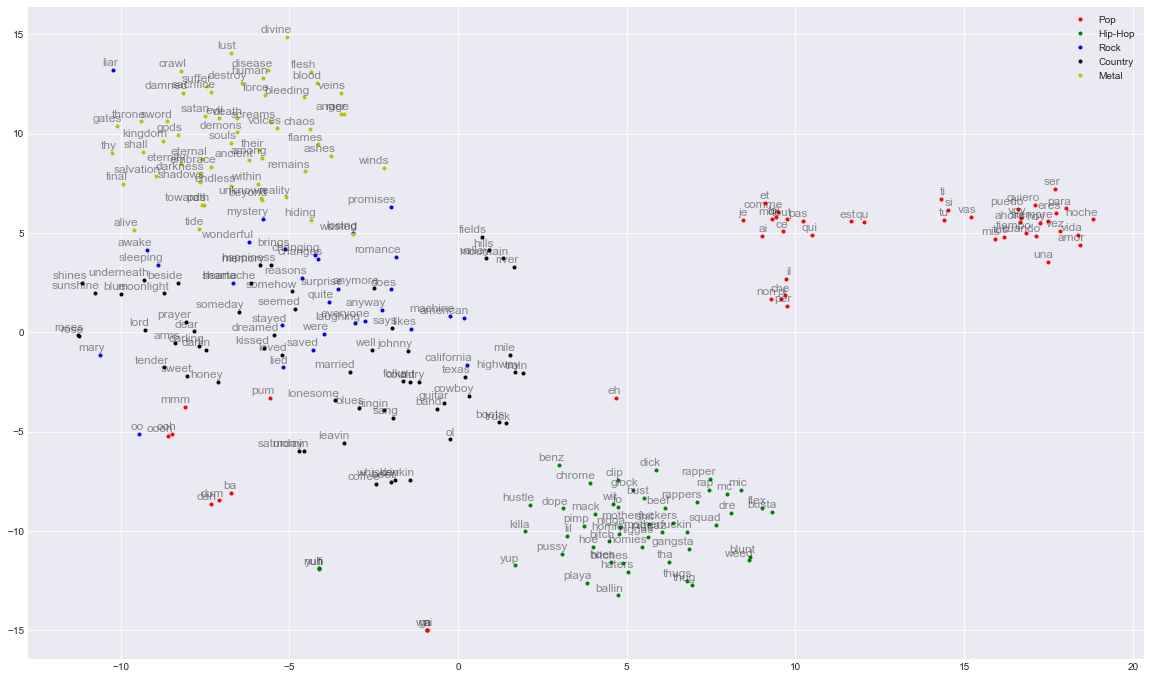

In [354]:
plt.figure(figsize=(20,12))

x = X_embedded[:,0];
y = X_embedded[:,1];

for i,genre in enumerate(genres):
    ids = np.where( word_genre==genre )[0]
    plt.plot(x[ids], y[ids], '.', color=colors[i], label=genre)
for i, word in enumerate(words):
    plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', size=12)
plt.legend();